In [1]:
%load_ext autoreload
%autoreload 2

import sys
sys.path.insert(0, './pyLDLE2/')

In [2]:
import numpy as np
from pyLDLE2 import util_, visualize_, datasets
from scipy.sparse import coo_matrix
from scipy import optimize
from scipy.special import erf, erfinv
from matplotlib import pyplot as plt
plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.serif'] = ['Times New Roman'] + plt.rcParams['font.serif']
from scipy.stats import chi2

import bx_util

matplotlib.get_backend() =  module://matplotlib_inline.backend_inline


In [3]:
vis = visualize_.Visualize()

In [14]:
X, labelsMat, ddX = datasets.Datasets().hemiflower_nonuniform(n=20000, noise=0.05, noise_type='uniform')

X.shape =  (6850, 3)


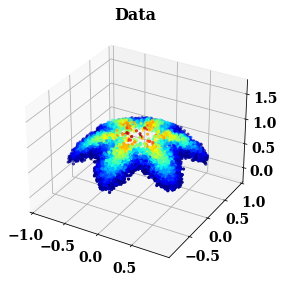

In [15]:
vis.data(X, ddX)

In [16]:
opts = bx_util.default_opts
opts['k_nn'] = 256
opts['k_tune'] = 256
opts['ds'] = True
opts['local_pca'] = True
s_list = (np.arange(20,41)/40).tolist()
bx_ds_list = []
bx_init_ds_list = []
K_ds_list = []
D_ds_list = []
for i in range(len(s_list)):
    s = s_list[i]
    print('s:', s, flush=True)
    opts['s'] = s
    if i == 0:
        bx_ds, bx_init_ds, K_ds, D_ds = bx_util.estimate_bx(X, opts=opts, ret_K_D = True)
    else:
        opts['K'] = K_ds
        opts['D'] = D_ds
        bx_ds, bx_init_ds, _, _ = bx_util.estimate_bx(X, opts=opts, ret_K_D = True)
    bx_ds_list.append(bx_ds)
    bx_init_ds_list.append(bx_init_ds)

s: 0.5
h: 0.05973950909801143
s: 0.525
h: 0.05973950909801143
s: 0.55
h: 0.05973950909801143
s: 0.575
h: 0.05973950909801143
s: 0.6
h: 0.05973950909801143
s: 0.625
h: 0.05973950909801143
s: 0.65
h: 0.05973950909801143
s: 0.675
h: 0.05973950909801143
s: 0.7
h: 0.05973950909801143
s: 0.725
h: 0.05973950909801143
s: 0.75
h: 0.05973950909801143
s: 0.775
h: 0.05973950909801143
s: 0.8
h: 0.05973950909801143
s: 0.825
h: 0.05973950909801143
s: 0.85
h: 0.05973950909801143
s: 0.875
h: 0.05973950909801143
s: 0.9
h: 0.05973950909801143
s: 0.925
h: 0.05973950909801143
s: 0.95
h: 0.05973950909801143
s: 0.975
h: 0.05973950909801143
s: 1.0
h: 0.05973950909801143


In [17]:
opts = bx_util.default_opts
opts['K'] = None
opts['k_nn'] = 256
opts['k_tune'] = 256
opts['ds'] = False
opts['local_pca'] = True
bx, bx_init = bx_util.estimate_bx(X, opts=opts)

h: 0.05973950909801143


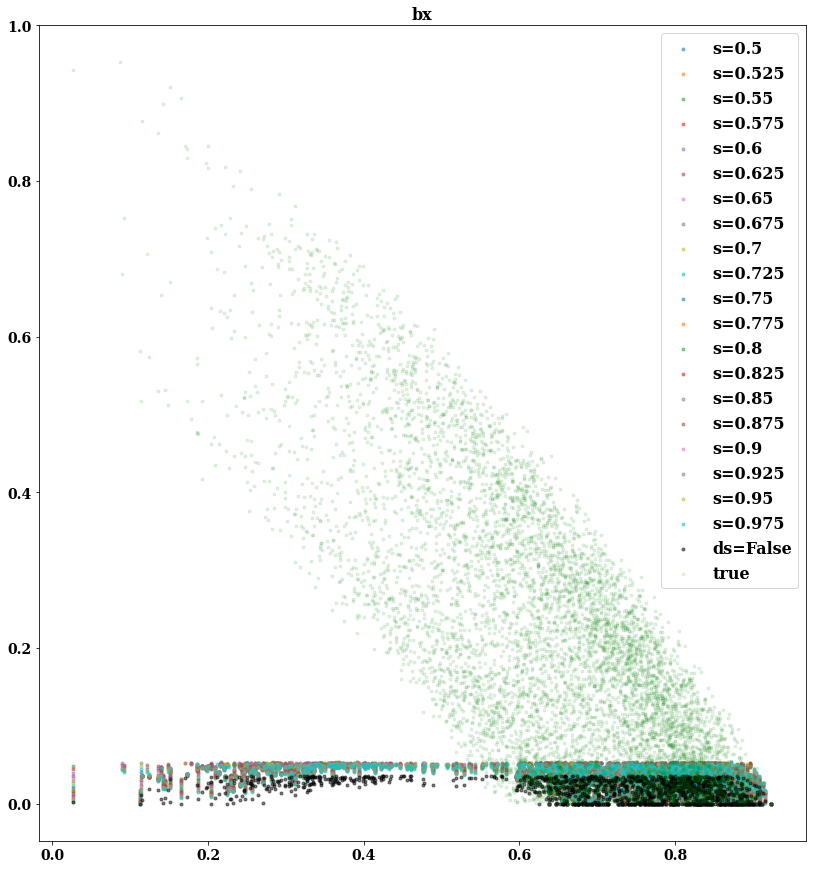

In [18]:
plt.figure(figsize=(15,15))
prctile = 20
for i in range(0,20):
    thresh = np.percentile(bx_ds_list[i], prctile)
    mask = bx_ds_list[i] < thresh
    plt.scatter(np.linalg.norm(X[mask,:2], axis=1), bx_ds_list[i][mask],
                label='s='+str(s_list[i]), alpha=0.5)
thresh = np.percentile(bx, prctile)
mask = bx < thresh
plt.scatter(np.linalg.norm(X[mask,:2], axis=1), bx[mask], color='k', label='ds=False', alpha=0.5)
plt.scatter(np.linalg.norm(X[:,:2], axis=1), ddX, color='g', label='true', alpha=0.1)
plt.title('bx')
plt.axis('image')
plt.legend()

In [19]:
srcc_stat = []
srcc_p = []
prctile = 20
for i in range(len(s_list)):
    res = bx_util.compute_SRCC(ddX, bx_ds_list[i], prctile=prctile)
    srcc_stat.append(res.correlation)
    srcc_p.append(res.pvalue)

In [20]:
res = bx_util.compute_SRCC(ddX, bx, prctile=prctile)
srcc_stat.append(res.correlation)
srcc_p.append(res.pvalue)

Text(0, 0.5, 'spearman rank corr')

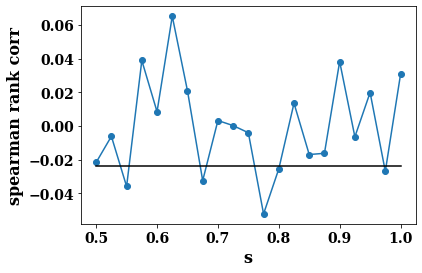

In [21]:
plt.figure()
plt.plot(s_list, srcc_stat[:-1], '-o')
plt.plot([s_list[0], s_list[-1]], [srcc_stat[-1],srcc_stat[-1]], 'k')
plt.xlabel('s')
plt.ylabel('spearman rank corr')

Text(0, 0.5, 'spearman rank p-value')

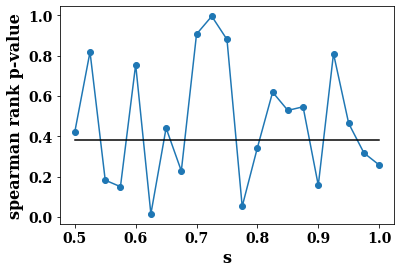

In [22]:
plt.figure()
plt.plot(s_list, srcc_p[:-1], '-o')
plt.plot([s_list[0], s_list[-1]], [srcc_p[-1],srcc_p[-1]], 'k')
plt.xlabel('s')
plt.ylabel('spearman rank p-value')